# Inverted flag example


This implementation requires ssmlearnpy: 
https://github.com/haller-group/SSMLearnPy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.linear_model import LinearRegression, Lasso

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
def PolynomialModel(X, Y, order):
    polyFeatures = PolynomialFeatures(order, include_bias = False)
    XXfeatures = polyFeatures.fit_transform(X.T)
    lr = LinearRegression(fit_intercept=False)#, alpha = 1e-10)
    return lr.fit(XXfeatures, Y.T)

In [6]:
def predict(X, lr, order):
    poly = PolynomialFeatures(order, include_bias = False)
    Xp = poly.fit_transform(X)
    return lr.predict(Xp)

In [7]:
def fitPolynomialModel(orderParam, orderDyn):
    parametrization = PolynomialModel(XParamVelocity, YVelocity, orderParam)
    dynamics = PolynomialModel(XParam, YParam, orderDyn)
    return parametrization, dynamics
    

In [8]:
xData = []
ndata = 19
for i in range(ndata):
    text_data = np.loadtxt('data/trajectory_%s.dat' %i)
    time_dispacement = [text_data[0,:].reshape(1,-1), 
                       text_data[1,:].reshape(1,-1)
                       ]
    xData.append(time_dispacement)

## SSMLearn with polynomial regression

In [9]:

# selecting the training and test trajectories
indTrain = [*range(0, 16)]

indTest = [*range(16, 19)]


In [ ]:
from ssmlearnpy import SSMLearn
import matplotlib.pyplot as plt


from ssmlearnpy.geometry.coordinates_embedding import coordinates_embedding
t_y, y, opts_embedding = coordinates_embedding([xData[i][0].ravel() for i in indTrain], [xData[i][1] for i in indTrain],
                                               imdim = 2, over_embedding = 20)

In [12]:
ssm = SSMLearn(
    t = t_y, 
    x = y, 
    derive_embdedding=False,
    ssm_dim=2, 
    dynamics_type = 'flow',
)

In [13]:
ssm.get_reduced_coordinates('linearchart')
ssm.get_parametrization()

INFO   2024-12-04 15:25:02 ridge Transforming data
INFO   2024-12-04 15:25:02 ridge Skipping CV on ridge regression
INFO   2024-12-04 15:25:02 ridge Fitting regression model


In [14]:
ssm.get_reduced_dynamics(poly_degree = 11)

INFO   2024-12-04 15:25:02 ridge Transforming data
INFO   2024-12-04 15:25:02 ridge Skipping CV on ridge regression
INFO   2024-12-04 15:25:02 ridge Fitting regression model


In [15]:
ssm.predict()

## Polynomial regression vs rational function approximation

$f(x)\approx y$

and assume 

$$
f(x) = \sum_{k}w_k x^k
$$
Let $X$ be the feature matrix, containing powers of the observed data. $Y$ is the function value. We then minimize the squared error

$$
||WX - Y||^2
$$

The solution is simply the zero singular vector of the feature matrix X. 

### Linearized rational function regression

Now assume instead that 

$$
f(x) = \frac{\sum_{k}p_k x^k}{\sum_k q_k x^k}
$$

Then we minimize 

$$
||f(x) - y|| \approx ||Y w_qX_q - w_pX_p||
$$

## No regularization

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def generate_features(X, order_num, order_denom, bias = True):
    polyFeatures_numerator = PolynomialFeatures(order_num, include_bias = bias)
    XX_p  = polyFeatures_numerator.fit_transform(X.T)
    polyFeatures_denom = PolynomialFeatures(order_denom, include_bias = bias)
    XX_q  = polyFeatures_denom.fit_transform(X.T)
    return XX_p, XX_q

In [18]:
def compute_Z_W(XXp, XXq,y):
    Z = np.linalg.pinv(XXp)@np.diag(y)@XXq
    W = XXp@Z - np.diag(y)@XXq
    return Z, W

In [19]:
def unregularized_approximant(X, y, order_num, order_denom):
    XX_p, XX_q = generate_features(X, order_num, order_denom, bias=True)
    #
    Z, W = compute_Z_W(XX_p, XX_q, y )
    u, s, v = np.linalg.svd(W)
    b = v[-1,:]
    a = Z@b
    return a,b#def rational_model(x, a, b):
        

In [20]:
def polynomial_approximant(X, y, order, bias = True):
    polyFeatures = PolynomialFeatures(order, include_bias = bias)
    XX_p  = polyFeatures_numerator.fit_transform(X.T)
    b = np.linalg.pinv(XX_p)@y
    return b#def rational_model(x, a, b):
        

In [21]:
order = 4

In [23]:
def rational_model(Xa, a, b, order_num, order_denom):
    XX_p, XX_q = generate_features(Xa, order_num, order_denom, bias=True)
    return (XX_p@a) / (XX_q@b)

In [24]:
def polynomial_model(Xa,b, order, bias = True):
    polyFeatures = PolynomialFeatures(order, include_bias = bias)
    XX_p  = polyFeatures_numerator.fit_transform(Xa)
    return (XX_p@b) 

In [25]:
from ssmlearnpy.reduced_dynamics.shift_or_differentiate import shift_or_differentiate

In [26]:
tdiff, etadiff = shift_or_differentiate(ssm.emb_data['reduced_coordinates'],
                                       ssm.emb_data['time'],
                                       'flow')

In [27]:
ETA = np.hstack((ssm.emb_data['reduced_coordinates']))
ETAdiff = np.hstack((etadiff))


In [28]:
from scipy.optimize import minimize, LinearConstraint

### Vectorial case

We now approximate a vectorial function, but with a common denominator

In [29]:
def generate_features(X, order_num, order_denom, bias = True):
    polyFeatures_numerator = PolynomialFeatures(order_num, include_bias = False)
    XX_p  = polyFeatures_numerator.fit_transform(X.T)
    polyFeatures_denom = PolynomialFeatures(order_denom, include_bias = bias)
    XX_q  = polyFeatures_denom.fit_transform(X.T)
    return XX_p, XX_q

In [30]:
def polynomial_approximant(X, y, order, bias = True):
    polyFeatures = PolynomialFeatures(order, include_bias = False)
    XX_p  = polyFeatures.fit_transform(X.T)
#    print(XX_p.shape)
    b = np.linalg.pinv(XX_p)@y
    return b#def rational_model(x, a, b):

In [31]:
M, N = 5,5

In [32]:
apoly = polynomial_approximant(ETA, ETAdiff.T, M)


In [33]:
XX_p, XX_q = generate_features(ETA, M, N)


In [34]:
num_unknowns_numerator = XX_p.shape[1]
num_unknowns_denominator = XX_q.shape[1]
b0 = np.zeros(num_unknowns_denominator)
sol0 = np.concatenate((b0, apoly.ravel()))

In [35]:
def error_function_vector(y, sol, XX_p, XX_q):
    num_unknowns_numerator = XX_p.shape[1]
    num_unknowns_denominator = XX_q.shape[1]
    b = sol[:num_unknowns_denominator]
    A = sol[num_unknowns_denominator:].reshape((num_unknowns_numerator, y.shape[1]))
#    print(a)
    error = XX_p @ A - (XX_q@b).reshape(-1,1)*y
    return error.ravel()#np.linalg.norm(error.ravel())**2#np.linalg.norm(error)**2


In [36]:
def error_function_scalar(y, sol, XX_p, XX_q):
    num_unknowns_numerator = XX_p.shape[1]
    num_unknowns_denominator = XX_q.shape[1]
    b = sol[:num_unknowns_denominator]
    A = sol[num_unknowns_denominator:].reshape((num_unknowns_numerator, y.shape[1]))
#    print(a)
    error = XX_p @ A - (XX_q@b).reshape(-1,1)*y
    return np.linalg.norm(error.ravel())**2#np.linalg.norm(error)**2


In [37]:
num_unknowns_numerator = apoly.shape[0]*apoly.shape[1]
num_constr_points = XX_p.shape[0]
num_unknowns_denominator = XX_q.shape[1]


In [38]:
from scipy.optimize import minimize, LinearConstraint, least_squares

In [40]:
constr_mtx = np.hstack((XX_q, np.zeros((num_constr_points, num_unknowns_numerator)) ))

In [41]:
lin_cons=LinearConstraint(constr_mtx, 0.5,np.inf)

First run an unconstrained optimization:

In [42]:
to_minimize = lambda r : error_function_vector(ETAdiff.T, r, XX_p, XX_q)

In [43]:
res_unconstrained = least_squares(to_minimize, sol0,  method='trf')

In [44]:
to_minimize(sol0)

array([-0.1946435 , -0.19898643, -0.20300059, ...,  1.38788614,
        2.31046455,  1.44482545])

In [45]:
to_minimize(res_unconstrained.x)

array([-1.67739010e-20, -1.82768225e-21, -1.67065188e-20, ...,
        5.77839103e-21, -1.59315373e-20,  5.64149939e-21])

In [46]:
res_unconstrained

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [-1.677e-20 -1.828e-21 ... -1.593e-20  5.641e-21]
           x: [ 3.812e-21 -3.145e-21 ... -4.023e-21 -3.441e-22]
        cost: 2.0166003307768596e-35
         jac: [[ 1.887e-01  3.562e-01 ...  3.577e-07 -0.000e+00]
               [-6.373e-02 -1.203e-01 ... -0.000e+00  3.577e-07]
               ...
               [-2.322e+00 -6.991e+00 ... -6.845e-02 -0.000e+00]
               [-1.521e+00 -4.579e+00 ... -0.000e+00 -6.845e-02]]
        grad: [-2.701e-17 -1.257e-15 ... -1.565e-17  1.783e-18]
  optimality: 1.7594484365814256e-13
 active_mask: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
        nfev: 3
        njev: 3

Then use it as an IC:

In [47]:
to_minimize = lambda r : error_function_scalar(ETAdiff.T, r, XX_p, XX_q)

In [48]:
res_constrained = minimize(to_minimize, res_unconstrained.x, constraints=lin_cons, method='SLSQP')

In [49]:
res_constrained

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 108.50480864759889
       x: [ 5.008e-01  1.748e-04 ... -3.078e-02  4.831e-02]
     nit: 64
     jac: [ 4.340e+02  1.811e+02 ... -5.913e-04  4.055e-03]
    nfev: 4285
    njev: 64

### Minimize the full-order loss function 

In [50]:
def error_function_scalar_rational(y, sol, XX_p, XX_q):
    num_unknowns_numerator = XX_p.shape[1]
    num_unknowns_denominator = XX_q.shape[1]
    b = sol[:num_unknowns_denominator]
    A = sol[num_unknowns_denominator:].reshape((num_unknowns_numerator, y.shape[1]))
#    print(a)
    error = (XX_p @ A) / (XX_q@b).reshape(-1,1) -y
    return np.linalg.norm(error.ravel())**2#np.linalg.norm(error)**2


In [51]:
to_minimize = lambda r : error_function_scalar_rational(ETAdiff.T, r, XX_p, XX_q)

In [52]:
res_constrained_rational = minimize(to_minimize,
                                    res_constrained.x,
                                    constraints=lin_cons,
                                    method='SLSQP', 
                                    options = {'maxiter': 200, 'maxfev': 20000})



/var/folders/63/3f75hvg57sg3ft1y4q72fj8mrcdrwp/T/ipykernel_58699/1012475292.py:1: OptimizeWarning: Unknown solver options: maxfev
  res_constrained_rational = minimize(to_minimize,


In [53]:
res_constrained_rational

 message: Iteration limit reached
 success: False
  status: 9
     fun: 359.4208627731347
       x: [ 5.005e-01 -3.417e-02 ...  5.602e-01  6.406e-01]
     nit: 200
     jac: [-1.156e-01 -2.040e-01 ... -3.570e-02 -7.500e-02]
    nfev: 12706
    njev: 200

### Evaluate models:


In [54]:
eta1 = np.linspace(-4, 4, 30)
eta2 = np.linspace(-1.2, 1.2, 30)
Eta1, Eta2 = np.meshgrid(eta1, eta2)


etaPlot = np.vstack((Eta1.ravel(), Eta2.ravel())).T

vectorfieldPlot = ssm.reduced_dynamics.predict(etaPlot).T
dEta1 = vectorfieldPlot[0,:].reshape(Eta1.shape)
dEta2 = vectorfieldPlot[1,:].reshape(Eta1.shape)


In [55]:
num_unknowns_numerator = XX_p.shape[1]
num_unknowns_denominator = XX_q.shape[1]
b_unconst = res_unconstrained.x[:num_unknowns_denominator]
A_unconst = res_unconstrained.x[num_unknowns_denominator:].reshape((num_unknowns_numerator, ETAdiff.T.shape[1]))

In [56]:
b_const = res_constrained_rational.x[:num_unknowns_denominator]
A_const = res_constrained_rational.x[num_unknowns_denominator:].reshape((num_unknowns_numerator, ETAdiff.T.shape[1]))

In [57]:
A_const

array([[ 4.63402021e-02, -6.27186074e-01],
       [-2.04122946e+00, -4.60887029e-01],
       [ 1.06259320e-03,  8.35092114e-03],
       [ 4.52690787e-02,  1.20067611e-01],
       [ 6.86946238e-01, -9.28663677e-01],
       [-1.52251561e-02,  1.22170911e-01],
       [-2.03332745e+00,  6.58191790e-01],
       [-1.28248857e+01,  2.40579122e-01],
       [-2.73540508e+01,  9.64293709e-01],
       [-5.71514979e-05, -3.31075553e-03],
       [ 2.87804195e-02, -4.98441504e-02],
       [ 3.09722042e-01,  2.51731738e-02],
       [ 6.91969908e-01, -3.55370090e-03],
       [-4.51372717e-01,  7.35387956e-01],
       [ 1.80403433e-03,  7.01142968e-03],
       [ 6.33293461e-02, -4.87181005e-02],
       [ 6.90953881e-01,  1.07532607e-01],
       [ 1.15679011e+00,  5.98962943e-01],
       [-2.07471360e-01,  3.29358876e+00],
       [ 5.60166983e-01,  6.40626362e-01]])

In [58]:
A_const.shape

(20, 2)

In [59]:
b_const.shape

(21,)

In [60]:
def rational_model(Xa, a, b, order_num, order_denom):
    XX_p, XX_q = generate_features(Xa, order_num, order_denom, bias=True)
    return (XX_p@a) / (XX_q@b).reshape(-1,1)

In [61]:
pts_mfd = rational_model(etaPlot.T, A_unconst, b_unconst, M, N).T
pts_mfd_cons = rational_model(etaPlot.T, A_const, b_const, M, N).T


Text(0.5, 1.0, 'Constrainted approximant')

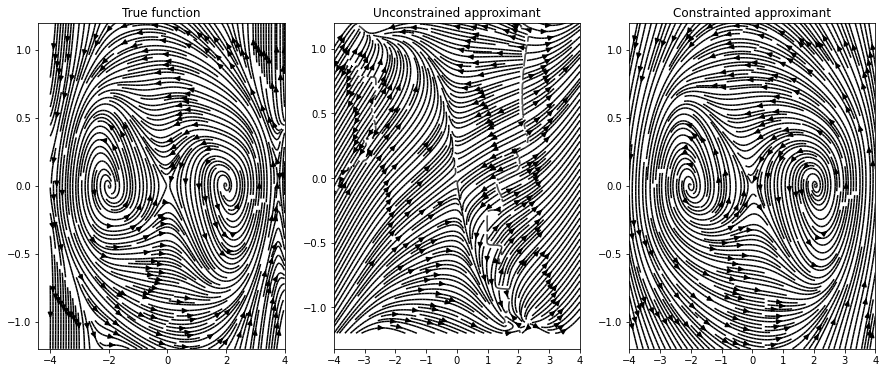

In [63]:
%matplotlib inline

f, axes = plt.subplots(1, 3, figsize = (15,6 ))
aa = axes[1].streamplot(Eta1, Eta2, pts_mfd[0,:].reshape(Eta1.shape), pts_mfd[1,:].reshape(Eta1.shape), color='black', density = 3)
aa2 = axes[0].streamplot(Eta1, Eta2, dEta1, dEta2, color='black', density = 3)

aa2 = axes[2].streamplot(Eta1, Eta2, pts_mfd_cons[0,:].reshape(Eta1.shape), pts_mfd_cons[1,:].reshape(Eta1.shape), color='black', density = 3)
axes[0].set_title('True function')
axes[1].set_title('Unconstrained approximant')
axes[2].set_title('Constrainted approximant')


## Finding the fixed points and the limit cycle

The phase portrait above suggests a coexistence of three fixed points: a saddle at $\eta_1 = \eta_2 = 0$, and two repellors in symmetric configurations at $(\pm \eta_1^*, 0)$.

In [64]:
from scipy.optimize import root

In [65]:
vectorfield = lambda x: rational_model(np.array(x).reshape(-1,1), A_const, b_const, M, N
                                                    ).ravel()

In [66]:
x0_1 = root(vectorfield, [-2, 0])
x0_2 = root(vectorfield, [2, 0])

In [67]:
from scipy.integrate import solve_ivp

In [68]:
vectorfield_to_integrate = lambda t, x: vectorfield(x)

In [69]:
ic_2 = 1e-4 * np.array([1,0])
ic_1 =1e-4 * np.array([-2,0])


In [72]:
unstable_manifold_1 = solve_ivp(vectorfield_to_integrate, [0, 100], ic_1,  t_eval= np.linspace(0, 100, 1000))
unstable_manifold_2 = solve_ivp(vectorfield_to_integrate, [0, 100],  -ic_1, t_eval= np.linspace(0, 100, 1000),)

In [73]:
stable_manifold_1 = solve_ivp(vectorfield_to_integrate, [0, -100], ic_2,  t_eval= np.linspace(0, -100, 1000))
stable_manifold_2 = solve_ivp(vectorfield_to_integrate, [0, -100],  -ic_2, t_eval= np.linspace(0, -100, 1000),)

In [74]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import rc

rc('font', **{'family': 'serif', 'serif': ['Computer Modern'],'size'   : 13})
rc('text', usetex=True)
#rc('text.latex', preamble = r'\usepackage{color}')

INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:35 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:

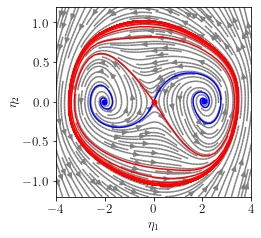

In [75]:
plt.figure(figsize = (3.5,3.5))

plt.streamplot(Eta1, Eta2, pts_mfd_cons[0,:].reshape(Eta1.shape), pts_mfd_cons[1,:].reshape(Eta1.shape), color='grey', density =2)
plt.xlabel('$\eta_1$')
plt.ylabel('$\eta_2$')



plt.plot(stable_manifold_1.y[0,:], stable_manifold_1.y[1,:], c= 'blue')
plt.plot(stable_manifold_2.y[0,:], stable_manifold_2.y[1,:], c= 'blue')

plt.plot(unstable_manifold_1.y[0,:], unstable_manifold_1.y[1,:], c= 'red')
plt.plot(unstable_manifold_2.y[0,:], unstable_manifold_2.y[1,:], c= 'red')

plt.plot(0,0, '.', markersize = 10, c='red')
plt.plot(*x0_1.x, '.', markersize = 10,  c='blue')
plt.plot(*x0_2.x, '.',  markersize = 10,  c='blue')
plt.savefig('manuscript_stuff/flag_dynamics.pdf', bbox_inches= 'tight')

### Predictions

In [77]:
from ssmlearnpy.geometry.coordinates_embedding import coordinates_embedding
t_y, y, opts_embedding = coordinates_embedding([xData[i][0].ravel() for i in indTest], [xData[i][1] for i in indTest],
                                               imdim = 2, over_embedding = 20)
reduced_coord_test = [ssm.encode(traj) for traj in y]

INFO   2024-12-04 15:27:51 coordinates_embedding The 25 embedding coordinates consist of the measured state and its 24 time-delayed measurements.


INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:53 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:27:

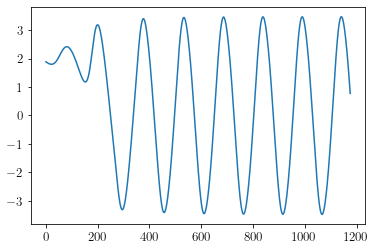

In [80]:
plt.figure()
plt.plot(ssm.reduced_dynamics_predictions['reduced_coordinates'][0][0,:])

INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:28 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-11 12:12:

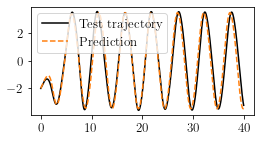

In [187]:
f, axes = plt.subplots(1, 1, figsize = (4,2 ))
for i in [0]:
    ic_ = reduced_coord_test[i][:,0]
    pred_rat = solve_ivp(vectorfield_to_integrate, [t_y[i][0], t_y[0][-1]], ic_,  t_eval= t_y[i])
    axes.plot(t_y[i], reduced_coord_test[i][0,:], '-',c= 'black', label = 'Test trajectory')
    axes.plot(t_y[i], pred_rat.y[0,:], '--',c= 'C1', label = 'Prediction')
plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('manuscript_stuff/flag_pred_1.pdf', bbox_inches= 'tight')
#    axes.set_xlim(0,40)

INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:23 texmanager No LaTeX-compatible font found for the serif fontfamily in rcParams. Using default.
INFO   2024-12-04 15:28:

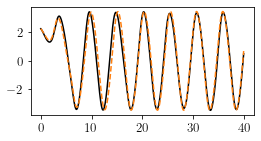

In [85]:
f, axes = plt.subplots(1, 1, figsize = (4,2 ))
for i in [2]:
    ic_ = reduced_coord_test[i][:,0]
    pred_rat = solve_ivp(vectorfield_to_integrate, [t_y[i][0], t_y[0][-1]], ic_,  t_eval= t_y[i])
    axes.plot(t_y[i], reduced_coord_test[i][0,:], '-',c= 'black', label = 'Test trajectory')
    axes.plot(t_y[i], pred_rat.y[0,:], '--',c= 'C1', label = 'Prediction')
#plt.legend(loc = 'upper left', fontsize = 8)
plt.savefig('manuscript_stuff/flag_pred_2.pdf', bbox_inches= 'tight')
#    axes.set_xlim(0,40)